# Introduction to regression models

Import relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

## Load data

In [3]:
wine_df = pd.read_csv('winequality-red.csv', delimiter=';')

In [4]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Exploratory data analysis

Explore the dataset. Visualize the data and try to understand what is the number of observations, where are the features and which is the target.

In [4]:
wine_df.describe

<bound method NDFrame.describe of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.0

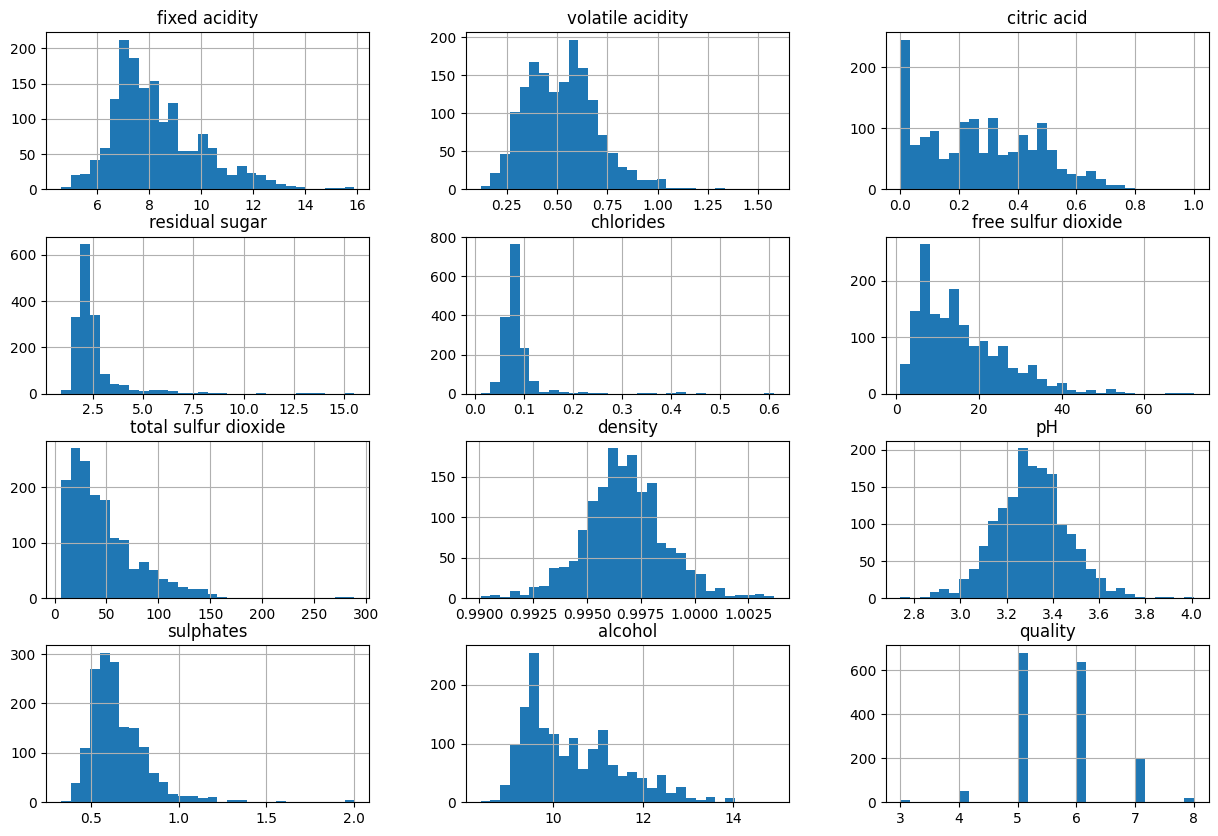

In [5]:
wine_df.hist(bins=30, figsize=(15, 10))
plt.show()

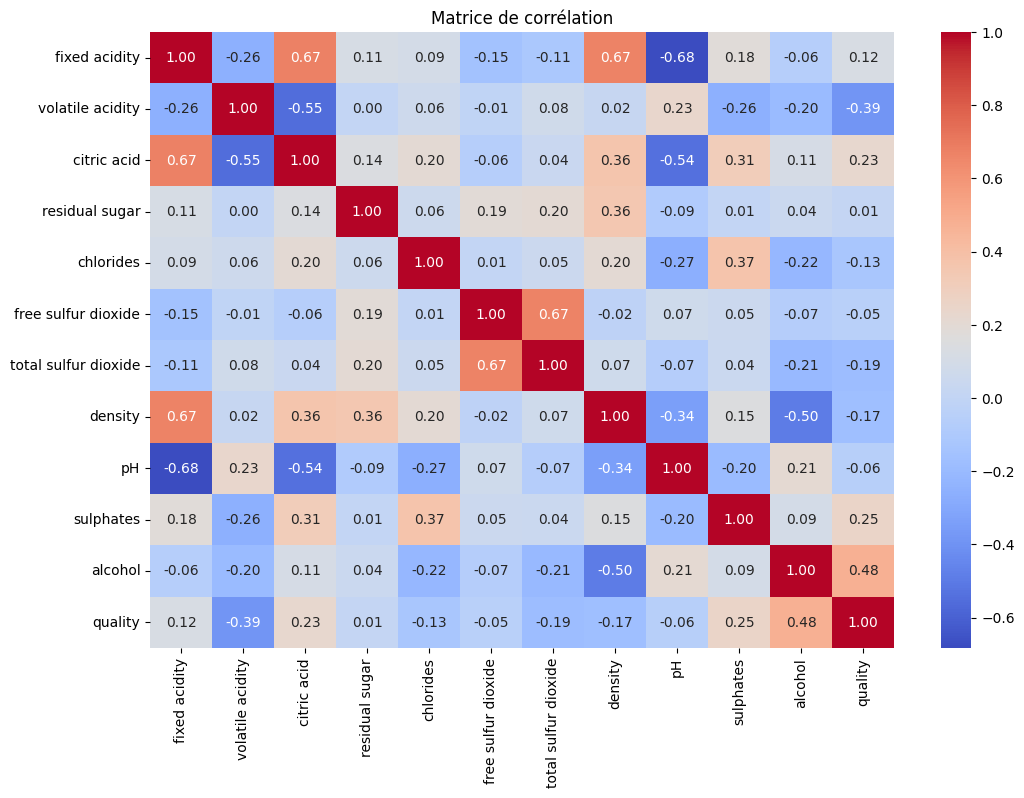

In [20]:
correlation_matrix = wine_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()

## Create your own linear model

Get 100 samples with random state (seed) = 1

In [6]:
np.random.seed(1)
random100_sam = wine_df.sample(n=100)
random100_sam

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
75,8.8,0.410,0.64,2.2,0.093,9.0,42.0,0.99860,3.54,0.66,10.5,5
1283,8.7,0.630,0.28,2.7,0.096,17.0,69.0,0.99734,3.26,0.63,10.2,6
408,10.4,0.340,0.58,3.7,0.174,6.0,16.0,0.99700,3.19,0.70,11.3,6
1281,7.1,0.460,0.20,1.9,0.077,28.0,54.0,0.99560,3.37,0.64,10.4,6
1118,7.1,0.390,0.12,2.1,0.065,14.0,24.0,0.99252,3.30,0.53,13.3,6
...,...,...,...,...,...,...,...,...,...,...,...,...
529,9.9,0.630,0.24,2.4,0.077,6.0,33.0,0.99740,3.09,0.57,9.4,5
912,10.0,0.460,0.44,2.9,0.065,4.0,8.0,0.99674,3.33,0.62,12.2,6
1227,9.0,0.580,0.25,2.0,0.104,8.0,21.0,0.99769,3.27,0.72,9.6,5
1374,6.8,0.815,0.00,1.2,0.267,16.0,29.0,0.99471,3.32,0.51,9.8,3


Plot pH in function of fixed acidity

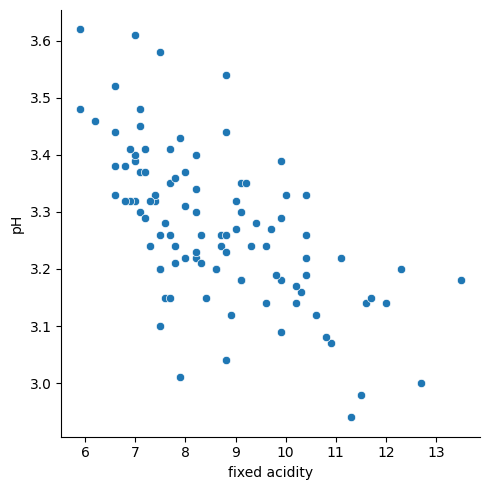

In [7]:
sns.relplot(x = random100_sam["fixed acidity"], y= random100_sam["pH"])

What can you say about pH and fixed acidity? are they correlated ? 

Juste avec l'observation on peut quand meme voir une certaine corelation qui montre que lorsque le pH diminue l'acidit" augmente et inversement mais le nuage de point reste assez dispersé donc pour etre plus precis sur la correlation il faudrait la calculer

Try to find a linear model by hand. plot it with the sample set

Hint: define an intercept and a slope. Then, plot it graphically

y = a * x + b, where a is slope and b is intercept

3.9357429718875494
-0.08032128514056325
9.075381526104671


<AxesSubplot:xlabel='fixed acidity', ylabel='pH'>

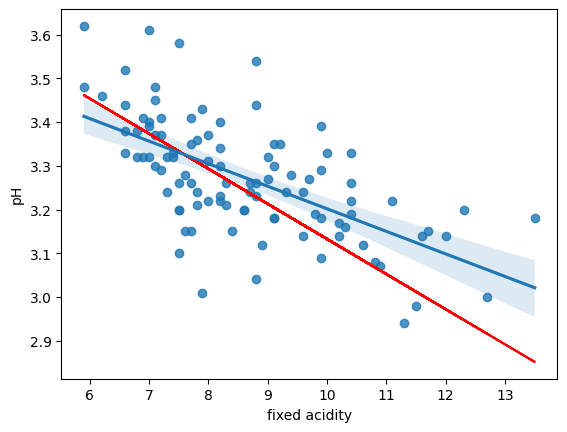

In [8]:
def somme_point(x, y, pente, intercept):
    pred_y = pente * x + intercept
    distances = np.abs(y-pred_y)#/np.sqrt(1+pente**2)
    return np.sum(distances)

x = random100_sam["fixed acidity"]
y = random100_sam["pH"]

best_pente = 0
best_intercept = 0
min_distance = float("inf")

for pente in np.linspace(-20, 20 , 250):
    for intercept in np.linspace(-20, 20, 250):
        distance = somme_point(x,y,pente, intercept)
        if distance < min_distance:
            best_pente = pente
            best_intercept = intercept
            min_distance = distance 
            
            
print(best_intercept)
print(best_pente)
print(min_distance)
plt.plot(x, best_pente * x + best_intercept, color="red")
sns.regplot(x=x,y=y)

what is the best linear model you can find ? try to find the optimal intercept and slope by your own

Hint: create your own algorithm to find the best intercept and slope

Help: if you lack of inspiration, you can try to implement the following algorithm:

1) choose a random $b_1$ and fix it. Then calculate the best $b-0$ that minimize the error of the prediction
- define X (fixed acidity) and y (pH)
- define a $b_1$ fixed
- define a range of $b_0$ to test
- define a function predict(x,b0,b1) that returns the predictions (y_pred)
- define a function calculate_error(y, y_pred) that estimate the sum of squared errors $e = \Sigma_i^{100}|y_i - y_{pred_i}|^2$
- for each $b_0$, find the $b_0 min$ that minimize $e$

2) fix $b_0$ with the $b_0 min$ you find before. Then, calculate the best $b_1 min$ that minimizes the error by following the same steps as before

3) fix $b_1$ with the new $b_1 min$ you found. Then, calculate a new $b_0 min$ that minimizes the error by following the same steps

4) reiterate on 2

In [15]:
X = random100_sam['fixed acidity']
y = random100_sam['pH']

b1 = 1

b0_values = np.linspace(-10, 10, 100)

def predict(X, b0, b1):
    return b0 + b1 * X

def calculate_error(y, y_pred):
    return np.sum((y - y_pred) ** 2)

errors_step1 = [calculate_error(y, predict(X, b0_new, b1)) for b0_new in b0_values]
best_b0 = b0_values[np.argmin(errors_step1)]

errors_step2 = [calculate_error(y, predict(X, best_b0, b1_new)) for b1_new in np.linspace(-10, 10, 100)]
best_b1 = np.linspace(-10, 10, 100)[np.argmin(errors_step2)]

print(best_b0)
print(best_b1)

-5.353535353535354
0.9090909090909083


Compare to seaborn regplot

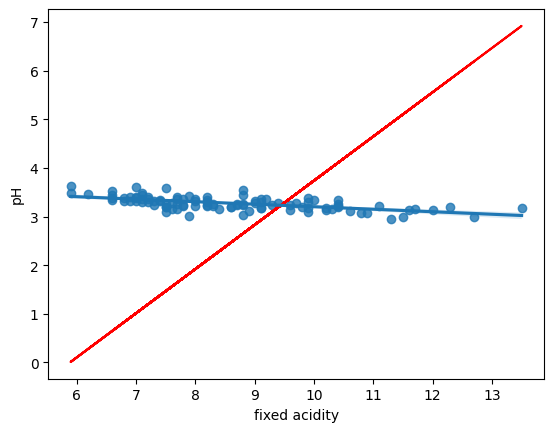

In [13]:
plt.plot(X, best_b1 * X + best_b0, color = "red")
sns.regplot(y='pH', x='fixed acidity', data=random100_sam);

In [ ]:
# plot your linear model with regplot and compare

How far is your linear model from seaborn model?

5.070432770814864
297.87229459238927


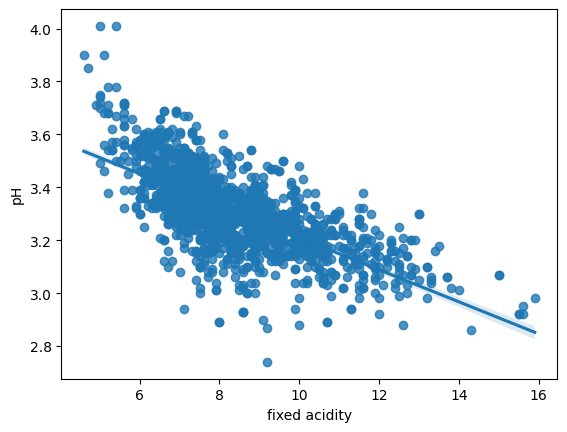

In [17]:
y_pred_custom = best_b0 + best_b1 * X
sse_custom = np.sum((y - y_pred_custom) ** 2)
y_pred_seaborn = sns.regplot(y='pH', x='fixed acidity', data=wine_df).get_lines()[0].get_ydata()[0:len(X)]
sse_seaborn = np.sum((y - y_pred_seaborn) ** 2)

print(sse_seaborn)
print(sse_custom)

How do you evaluate the performance of your linear models at each iteration ?

In [ ]:
médiocre

Try to create a method where each time you define a slope or intercept, you reduce the error of the model. Then, you iterate to find the best model

Hint: choose a fixed intercept, find the slope that reduce the error of the model. Then keep that slope, find the new intercept that reduce the error of the model ...

In [18]:
def lin_regres(X, y, initial_b0, num_iterations=1000, step_size=0.01):
    b0 = initial_b0
    b1 = 0
    
    def calculate_error(y, y_pred):
        return np.sum((y - y_pred) ** 2)
    
    errors = []
    for b1_new in np.linspace(-10, 10, 100):
        y_pred = b0 + b1_new * X
        error = calculate_error(y, y_pred)
        errors.append(error)
    best_b1 = np.linspace(-10, 10, 100)[np.argmin(errors)]
    
    errors = []
    for b0_new in np.linspace(-10, 10, 100):  
        y_pred = b0_new + best_b1 * X
        error = calculate_error(y, y_pred)
        errors.append(error)
    best_b0 = np.linspace(-10, 10, 100)[np.argmin(errors)]
    
    return best_b0, best_b1

X = random100_sam['fixed acidity']
y = random100_sam['pH']
initial_b0 = 0

best_b0, best_b1 = lin_regres(X, y, initial_b0)
print(best_b0)
print(best_b1)

0.7070707070707076
0.30303030303030276


How many iterations did you tried ? what are the best intercept and slope you found? Are you closer to the seaborn linear model ?  

1000 itérations 0.7 Inter nop

According to you ... is this the OLS method ? can you describe with your own words, how it works? how different is from your method ?

NON OLS méthode se refere plutot a some_point()

Compare with the Linear regression used in scikit learn

[-0.051601]
3.7176554637668797


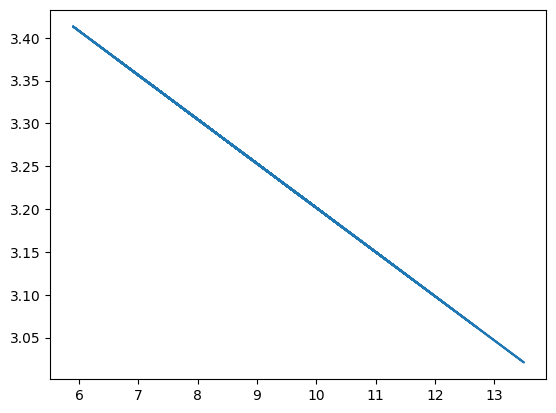

In [19]:
# Import the model
from sklearn.linear_model import LinearRegression

# Instanciate the model
model = LinearRegression()

# Define X and y
X = random100_sam[['fixed acidity']]
y = random100_sam['pH']

# Train the model on the data
model.fit(X, y)

# check results
# model's slope (a)
print(model.coef_)

# model's intercept (b)
print(model.intercept_)
plt.plot(X,model.coef_ * X + model.intercept_)

Are you close to these values ?

In [ ]:
oauis vitef

How do you interpret these values? What do they say about the pH and fixed acidity?

que notre hypothése de depart semble juste

## inference analysis

Get a new sample of 100 with different random state (seed) = 60

In [24]:
np.random.seed(60)
random100_seed60 = wine_df.sample(n=100)
random100_seed60

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
31,6.9,0.685,0.00,2.5,0.105,22.0,37.0,0.99660,3.46,0.57,10.6,6
844,9.9,0.250,0.46,1.7,0.062,26.0,42.0,0.99590,3.18,0.83,10.6,6
1573,6.0,0.580,0.20,2.4,0.075,15.0,50.0,0.99467,3.58,0.67,12.5,6
150,7.3,0.330,0.47,2.1,0.077,5.0,11.0,0.99580,3.33,0.53,10.3,6
258,7.7,0.410,0.76,1.8,0.611,8.0,45.0,0.99680,3.06,1.26,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1350,9.0,0.600,0.29,2.0,0.069,32.0,73.0,0.99654,3.34,0.57,10.0,5
677,8.6,0.800,0.11,2.3,0.084,12.0,31.0,0.99790,3.40,0.48,9.9,5
712,8.7,0.690,0.00,3.2,0.084,13.0,33.0,0.99920,3.36,0.45,9.4,5
1078,8.6,0.370,0.65,6.4,0.080,3.0,8.0,0.99817,3.27,0.58,11.0,5


Try to plot a regplot with the sckitlearn coefficients, your best coefficient calculated before. Does your best linear model (sklearn) fit with this new sample set ?  Why ?

Hint: read about what is overfit?

In [31]:
X = random100_sam[['fixed acidity']]
y = random100_sam['pH']

model = LinearRegression()

sklearn_intercept = model.intercept_
sklearn_slope = model.coef_[0]

plt.figure(figsize=(8, 6))
sns.regplot(x='fixed acidity', y='pH', data=random100_sam, scatter_kws={'alpha': 0.5}, line_kws={'color': 'blue'}, label='Scikit-learn Model')

plt.plot(X, best_b0 + best_b1 * X, color='red', label='Custom Model')

plt.xlabel('Fixed Acidity')
plt.ylabel('pH')
plt.title('Comparison of Linear Models')
plt.legend()

plt.show()

AttributeError: 'LinearRegression' object has no attribute 'intercept_'

How can you solve the problem ?

IL FAUT SPLIT LA DATA VITE LA DATA SPLITER LA 

# Predict wine quality - regression problem

## Simple Linear regression

Let's try to create a new linear regression. This time, try to find the best model to predict quality in function of pH

Follow the same steps as before: 
- choose a random sample with fixed seed
- use seaborn to see the linear model in this sample
- calculate the best linear regression
- check if the model fits with a new sample

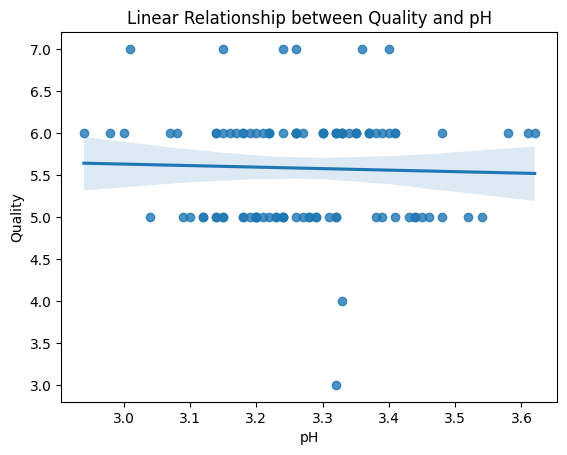

Intercept: 6.167788669089749
Slope: -0.1796035900295624
Mean Squared Error: 0.4430313750339664
Mean Squared Error on New Sample: 0.4430313750339664


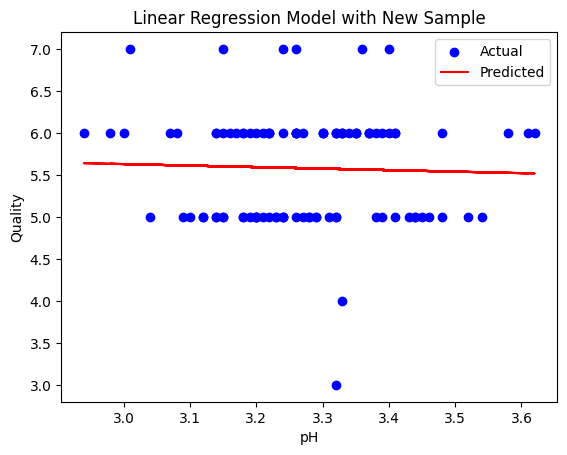

In [35]:
np.random.seed(10)

sns.regplot(x='pH', y='quality', data=random100_sam)
plt.xlabel('pH')
plt.ylabel('Quality')
plt.title('Linear Relationship between Quality and pH')
plt.show()

X = random_sample[['pH']]
y = random_sample['quality']

model = LinearRegression()
model.fit(X, y)

intercept = model.intercept_
slope = model.coef_[0]

print("Intercept:", intercept)
print("Slope:", slope)

y_pred = model.predict(X)

mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)

new_sample = dataset.sample(n=100, random_state=123)

X_new = new_sample[['pH']]
y_new = new_sample['quality']
y_pred_new = model.predict(X_new)
mse_new = mean_squared_error(y_new, y_pred_new)
print("Mean Squared Error on New Sample:", mse_new)

plt.scatter(X_new, y_new, color='blue', label='Actual')
plt.plot(X_new, y_pred_new, color='red', label='Predicted')
plt.xlabel('pH')
plt.ylabel('Quality')
plt.title('Linear Regression Model with New Sample')
plt.legend()
plt.show()


How good is this model performing? What is the error? is it low or high ?

bah 0.4 c'est pas ouf ouf mais ca va, le probleme c'est un peu les données un peu le modéle va savoir

### Using Holdout method 

Let's use the train split method to divide the dataset in 70% train set and 30% test set. This time we will use another feature. Let's try with fixed acidity this time

In [30]:
X = random100_sam[['fixed acidity']]
y = random100_sam['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

model = LinearRegression()

model.fit(X_train, y_train)

model.score(X_test, y_test)

-0.05402177703709299

négatif c'est catastrophique ca nous dit que le modele performe moins que si on prenait des valeurs aléatoires

Is this score good or bad? What does it means? 

Try to use regplot to compare with your new model and understand graphically what is happening for the train and test set. you should try two graphics: (one using the X_train,y_train and another one using X_test, y_test)


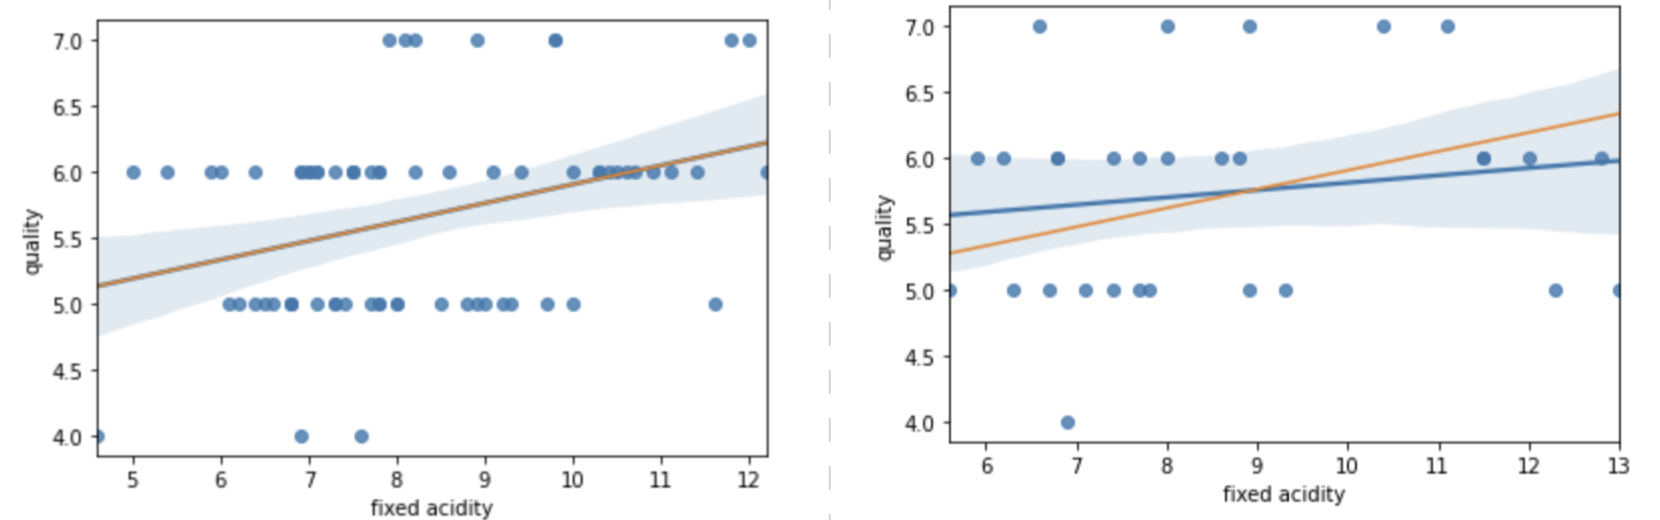

Try another feature. Replace your X with volatile acidity, alcohol ...

Which feature increases this value? 

Do you think you can do better ?

## Multi linear regression

Let's add multiple features in the regression model. Then create a new model and compare your results with Simple regression. Is it better or worst? 

In [ ]:
X = sample_wine_df[['pH','alcohol', 'fixed acidity', 'density', 'chlorides']]

In [42]:
X = random100_sam[['pH', 'alcohol', 'fixed acidity', 'density', 'chlorides']]
y = random100_sam['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_simple = LinearRegression()
model_simple.fit(X_train[['pH']], y_train)
y_pred_simple = model_simple.predict(X_test[['pH']])
mse_simple = mean_squared_error(y_test, y_pred_simple)
r2_simple = r2_score(y_test, y_pred_simple)

print("Mean Squared Error:", mse_simple)
print("R-squared:", r2_simple)

model_multiple = LinearRegression()
model_multiple.fit(X_train, y_train)
y_pred_multiple = model_multiple.predict(X_test)
mse_multiple = mean_squared_error(y_test, y_pred_multiple)
r2_multiple = r2_score(y_test, y_pred_multiple)

print("Mean Squared Error:", mse_multiple)
print("R-squared:", r2_multiple)

Mean Squared Error: 0.24763626715210346
R-squared: -0.0005505743519327311
Mean Squared Error: 0.16433751907645594
R-squared: 0.33601002393351165


Try with all the features (all without column quality of course). 

Create a new model and compare with the last one. Is it better? Why? 



In [43]:
X = random100_sam[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
y = random100_sam['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_simple = LinearRegression()
model_simple.fit(X_train[['pH']], y_train)
y_pred_simple = model_simple.predict(X_test[['pH']])
mse_simple = mean_squared_error(y_test, y_pred_simple)
r2_simple = r2_score(y_test, y_pred_simple)

print("Mean Squared Error:", mse_simple)
print("R-squared:", r2_simple)

model_multiple = LinearRegression()
model_multiple.fit(X_train, y_train)
y_pred_multiple = model_multiple.predict(X_test)
mse_multiple = mean_squared_error(y_test, y_pred_multiple)
r2_multiple = r2_score(y_test, y_pred_multiple)

print("Mean Squared Error:", mse_multiple)
print("R-squared:", r2_multiple)

Mean Squared Error: 0.24763626715210346
R-squared: -0.0005505743519327311
Mean Squared Error: 0.2639071813912766
R-squared: -0.06629164198495552


If you add the column quality in the variable X, what would happen ? 

Hint: read about **data leakage**

In [44]:
X = random100_sam[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol','quality']]
y = random100_sam['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_simple = LinearRegression()
model_simple.fit(X_train[['pH']], y_train)
y_pred_simple = model_simple.predict(X_test[['pH']])
mse_simple = mean_squared_error(y_test, y_pred_simple)
r2_simple = r2_score(y_test, y_pred_simple)

print("Mean Squared Error:", mse_simple)
print("R-squared:", r2_simple)

model_multiple = LinearRegression()
model_multiple.fit(X_train, y_train)
y_pred_multiple = model_multiple.predict(X_test)
mse_multiple = mean_squared_error(y_test, y_pred_multiple)
r2_multiple = r2_score(y_test, y_pred_multiple)

print("Mean Squared Error:", mse_multiple)
print("R-squared:", r2_multiple)

Mean Squared Error: 0.24763626715210346
R-squared: -0.0005505743519327311
Mean Squared Error: 8.283039504820624e-31
R-squared: 1.0


Do you think that there are features that are not helping to increase the performance? Which ones do you suspect? 

In [ ]:
YES OF COURSE 

Do you know a method to identify them? 

How can you find the best combination of features to increase the performance of the model?

# Predict wine quality - classification problem

## convert quality column in 2 classes

Create a classification version (good or bad) of target variable (quality). To do so, let's consider that the wine with quality equal of higher than 7 is good quality and the rest bad quality. 

You can call the new column goodquality

In [11]:
def classify_quality(quality):
    if quality >= 7:
        return 1
    else:
        return 0

wine_df['goodquality'] = wine_df['quality'].apply(classify_quality)

wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


How many samples are considered as good and how many are bad? Is this balanced

In [14]:
quality_counts = wine_df['goodquality'].value_counts()

print(quality_counts)

0    1382
1     217
Name: goodquality, dtype: int64


## Simple Logistic regression

Try to create a first logistic regression model from a sample

In [18]:
np.random.seed(12)
random100_sammod = wine_df.sample(n=400)
random100_sammod

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
75,8.8,0.410,0.64,2.2,0.093,9.0,42.0,0.99860,3.54,0.66,10.5,5,0
1283,8.7,0.630,0.28,2.7,0.096,17.0,69.0,0.99734,3.26,0.63,10.2,6,0
408,10.4,0.340,0.58,3.7,0.174,6.0,16.0,0.99700,3.19,0.70,11.3,6,0
1281,7.1,0.460,0.20,1.9,0.077,28.0,54.0,0.99560,3.37,0.64,10.4,6,0
1118,7.1,0.390,0.12,2.1,0.065,14.0,24.0,0.99252,3.30,0.53,13.3,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1416,10.0,0.320,0.59,2.2,0.077,3.0,15.0,0.99940,3.20,0.78,9.6,5,0
1567,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5,0
1204,7.2,0.360,0.46,2.1,0.074,24.0,44.0,0.99534,3.40,0.85,11.0,7,1
12,5.6,0.615,0.00,1.6,0.089,16.0,59.0,0.99430,3.58,0.52,9.9,5,0


In [27]:
X = random100_sammod[["alcohol"]]
y = random100_sammod[['goodquality']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)

print(accuracy)
conf_matrix

0.825


/home/jsles/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[65,  3],
       [11,  1]])

In classification, how do you evaluate the performance of the model ?

hint: read more about classification_report from scikit learn

In [28]:
X = random100_sammod[["pH"]]
y = random100_sammod[['goodquality']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)

print(accuracy)
conf_matrix

0.85


/home/jsles/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[68,  0],
       [12,  0]])

Try different pair of data sets: (pH, goodquality), (fixed acidity, goodquality), (alcohol, goodquality) 

Which pair performs better?

In [29]:
X = random100_sammod[["fixed acidity"]]
y = random100_sammod[['goodquality']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)

print(accuracy)
conf_matrix

0.85


/home/jsles/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[68,  0],
       [12,  0]])

## Multi logistic regression

Add new features to the model, try to find the best model reducing the error. 

Use everything you learned so far and good luck :)

In [32]:
X = random100_sammod.drop("goodquality", axis=1)
y = random100_sammod[['goodquality']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)

print(accuracy)
conf_matrix

0.9625


/home/jsles/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jsles/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[68,  0],
       [ 3,  9]])